In [38]:
import numpy as np
from matplotlib import pyplot as plt
import csv
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

import pandas as pd

In [39]:
def load_dataset_csv(data_path):
    with open(data_path, newline='') as f:
        csv_reader = csv.reader(f)    

        next(csv_reader)

        X = []
        y = []

        for row in csv_reader:
            X.append(row[0])
            y.append(row[1])
        
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)
    
    sorted_indices = np.argsort(X) # sort arrays x = [3, 1, 2], np.argsort(x) will return [1, 2, 0]
    x_sorted = X[sorted_indices]
    y_sorted = y[sorted_indices]

    return x_sorted, y_sorted

In [40]:
def polynomial_regression(X, y, n):
    poly = PolynomialFeatures(degree=n, include_bias=False)
    poly_features = poly.fit_transform(X.reshape(-1, 1)) # transform to 2d array, [[index, value]]
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y)
    y_predicted = poly_reg_model.predict(poly_features)
    
    
    return y_predicted

In [41]:
def kfold_crossval(X, y, n, k=10):
    kf = KFold(k)
    meanSquaredErros = []
    
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index]
        
    
    # iterate in k folds through the dataset X (data points), y (predictions) 
        # for each fold:
            # train regression model (polynomial regression of degree n)
            # test on validation data

    # return mean loss
    pass

In [42]:
def find_best_poly_model(X, y, n=9):

    #TODO
    # for each degree:
        # find k-fold mean loss
    # select best model
    # return degree
    pass

In [43]:
def plot(X, y, w):
    """
    This functions plots 2D data assuming a linear model with
    polynomial basis functions. The weights have to be provided
    in ascending order in the degree of polynomials.
    """

    plt.plot(X, y, ".r", markersize=8, label="Samples")

    x_plot = np.linspace(np.min(X), np.max(X), 100)
    X_plot = np.vander(x_plot, N=len(w))

    # set plotting range properly
    plt.ylim((np.min(y) * 1.2, np.max(y) * 1.2))

    plt.plot(
        x_plot,
        X_plot @ w,
        linewidth=5,
        color="tab:blue",
        label="Model",
    )

    plt.tight_layout()
    plt.show()

TypeError: object of type 'int' has no len()

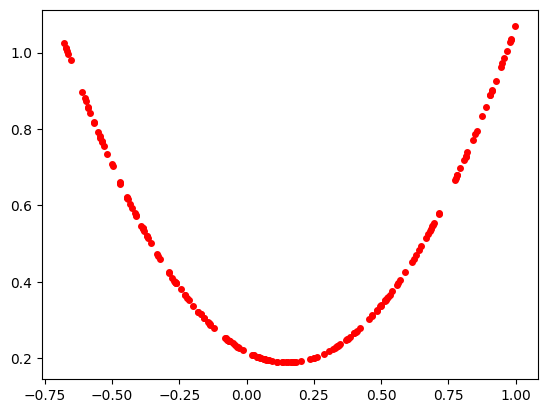

In [44]:
# TODO

dataset0X, dataset0Y = load_dataset_csv('./dataset0.csv')
predicted_y = polynomial_regression(dataset0X, dataset0Y, 2)
plt.plot(dataset0X, predicted_y)
plt.show()

dataset1X, dataset1Y = load_dataset_csv('./dataset1.csv')
predicted_y = polynomial_regression(dataset1X, dataset1Y, 2)
plt.plot(dataset1X, predicted_y)
plt.show()

dataset2X, dataset2Y = load_dataset_csv('./dataset2.csv')
predicted_y = polynomial_regression(dataset2X, dataset2Y, 2)
plt.plot(dataset2X, predicted_y)
plt.show()

# Find best degree polynomial
# fit whole dataset
# look at results